In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt

In [2]:
# Importing CSV files


df_adjust_Limits = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\1 Preprocess\Continuous Data\contData_all.csv")

df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\CSVs\adjust_limits.csv")


In [3]:
num_columns = df_adjust_Limits.shape[1]
print("Number of features:", num_columns)

Number of features: 50


In [4]:
# # Convert 'Date' column to datetime in df_adjust_Limits and df_LD using the appropriate format
# df_adjust_Limits['Date'] = pd.to_datetime(df_adjust_Limits['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# # Check for NaT entries in both dataframes
# nat_count_CD = df_adjust_Limits['Date'].isna().sum()

df_adjust_Limits.describe()

,425 %Al,Butanol,Decanol,Ethanol,Hexanol,Octanol,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B
count,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000,98327.000000
mean,2.396896,170.647202,8.684468,43.269922,9.715108,7.818537,9.303749,0.924679,0.945538,0.989775,30842.140405,27251.388966,4544.818564,660.379786,33026.009894,30267.898965,26703.948031,23716.633142,5171.555593,296.300940,8.565719,1.839758,26602.011980,143.331518,57.830755,49.993496,46.691614,55.215005,32.773431,46.849329,40.422922,1.776657,-1.096718,0.803513,74.688712,140.739104,149.818781,150.774947,161.262216,195.154524,140.369322,186.951318,186.239821,181.337855,180.824158,174.611802,209.794279,204.989796,2.498648
std,156.084782,805.284680,62.016956,127.973798,126.365781,50.653135,7.769288,0.076280,0.058443,0.056152,11071.193438,12884.370728,2654.946859,643.748538,19632.230749,17991.098746,15831.628669,9848.807570,2669.660413,287.247087,60.808648,27.547306,15406.575187,69.210373,16.216936,26.673514,25.840620,28.555279,17.459507,26.170208,21.400513,1.757398,1.230524,1.287644,16.822128,59.686011,69.047767,63.253902,74.415205,316.477217,95.715374,42.640330,34.936177,39.238189,30.716239,38.643645,46.396290,48.224073,1.468497
min,-9986.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-63.099400,0.000000,0.000000,0.000000,-428.202000,-45.776400,-24.455300,-19.480800,-8745.360000,-7000.000000,-12997.800000,-106.878000,0.000000,-9.608200,0.000000,0.000000,-29.830200,-192.500000,-5.000000,-0.631361,-0.631604,-0.627794,-0.750000,0.000000,0.000000,-9.935260,-9.653360,-4.811260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.760100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.038090
25%,5.973125,4.067800,1.635025,6.516165,1.843330,2.168490,7.339090,0.881136,0.916397,0.963654,26633.200000,23814.950000,3464.340000,3.850420,20759.400000,19822.050000,17913.600000,22782.500000,5751.050000,0.064543,0.946653,0.720765,17879.850000,132.095000,60.569250,49.090500,42.436150,64.262500,36.846000,27.162150,23.206350,0.501265,-2.028380,0.000000,63.954100,142.188000,135.086000,179.601000,174.002000,67.019900,117.675000,181.286000,181.802000,179.430000,180.514500,175.811000,216.933500,215.045500,1.829735
50%,6.120370,7.767170,2.830000,16.333300,3.298010,3.876100,10.427100,0.937517,0.943769,0.992881,35156.700000,30668.600000,5576.050000,593.434000,42196.200000,39383.900000,35861.900000,28234.800000,6439.210000,276.167000,0.988701,0.768304,34845.100000,158.997000,62.875000,64.350500,55.301100,69.328300,40.790400,49.762300,46.332100,1.593240,-0.793228,0.471566,75.886100,164.559000,167.764000,180.043000,194.758000,79.615600,128.844000,197.006000,194.197000,191.513000,188.244000,183.399000,220.968000,218.073000,2.442150
75%,6.267995,33.809950,4.582380,40.072600,5.448520,5.906670,12.179650,0.983007,0.982361,1.021520,38680.950000,35229.800000,6311.520000,1149.245000,47400.750000,42981.900000,38103.550000,29752.400000,6737.685000,459.662500,1.020060,0.787371,38032.900000,184.493000,64.802400,67.400800,65.154700,71.452900,41.429250,67.214850,56.268200,2.824055,-0.003117,1.538110,84.677150,178.445500,191.97

In [5]:
# Annotate all range adjustements with rationale

#df_adjustments = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Data\CSV to PRocess\RangeD.csv")
df_adjustments

,Range,425 %Al,Butanol,Decanol,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FI55580,FYC55553,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,TI55565,TI90366,TI90368
0,Min,0,0,0,0,5000,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-10.0,-10.0,-4.7,0,100,100,100,0,0,0,0,0,0,0,0,0,150,0
1,Max,10,100,10,50000,50000,40000,3000,70000,70000,52000,70000,12800,1500,10,1,70000,60000,100,100,100,100,100,100,100,20.3,20.3,10.3,250.0,300,275,300,300,125,300,300,300,300,300,350,350,300,200,200


In [6]:
#Finds and removes system limit (Min/Max) values

# Assuming df_adjustments and df_adjust_Limits are your dataframes

# Extract the min and max rows from df_adjustments into separate Series
min_values = df_adjustments[df_adjustments['Range'] == 'Min'].iloc[0, 1:]
max_values = df_adjustments[df_adjustments['Range'] == 'Max'].iloc[0, 1:]

# Iterate through each column in df_adjust_Limits
for col in df_adjust_Limits.columns:
    # Check if the column exists in df_adjustments
    if col in min_values.index:
        # Get the min and max values for this column from df_adjustments
        min_val = min_values[col]
        max_val = max_values[col]
        
        # Filter out values in df_adjust_Limits that are less than min or greater than max
        df_adjust_Limits.loc[df_adjust_Limits[col] < min_val, col] = None
        df_adjust_Limits.loc[df_adjust_Limits[col] > max_val, col] = None


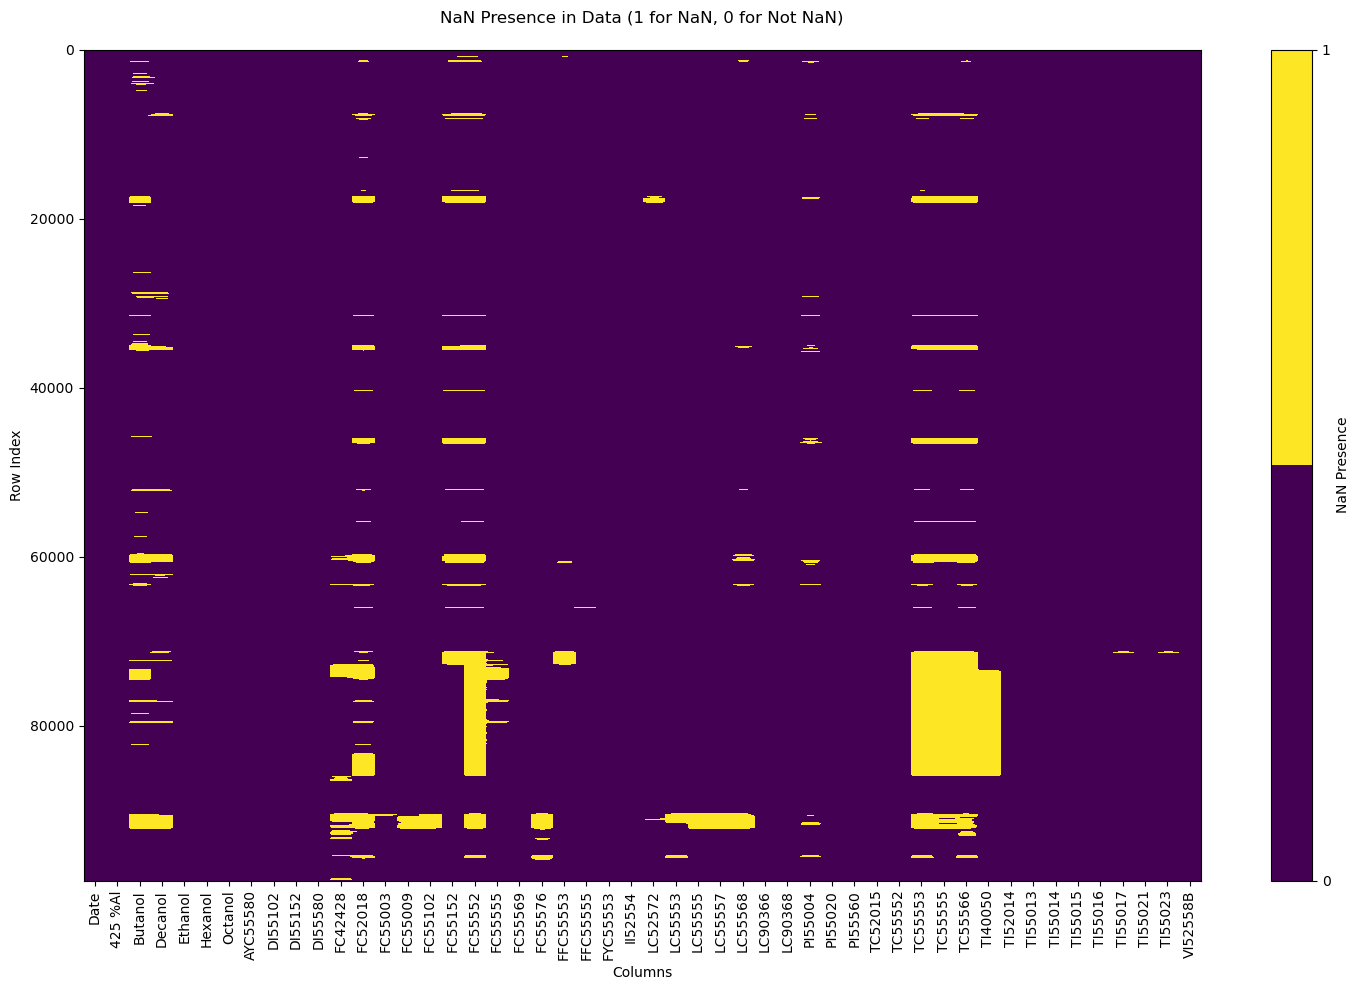

In [7]:
# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_adjust_Limits.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_adjust_Limits.shape[1]), df_adjust_Limits.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()

In [8]:
# Calculate the statistics for each column in df_adjust_Limits
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

          ID  total_rows  non_nan_count  nan_count  nan_percentage
0       Date       98327          98327          0        0.000000
1    425 %Al       98327          98257         70        0.071191
2    Butanol       98327          82674      15653       15.919330
3    Decanol       98327          89884       8443        8.586655
4    Ethanol       98327          98327          0        0.000000
5    Hexanol       98327          98327          0        0.000000
6    Octanol       98327          98327          0        0.000000
7   AYC55580       98327          98327          0        0.000000
8    DI55102       98327          98327          0        0.000000
9    DI55152       98327          98327          0        0.000000
10   DI55580       98327          98327          0        0.000000
11   FC42428       98327          92845       5482        5.575274
12   FC52018       98327          83873      14454       14.699930
13   FC55003       98327          98080        247        0.25

In [9]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_adjust_Limits = df_adjust_Limits.dropna()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_adjust_Limits)
non_nan_count = df_adjust_Limits.count()
nan_count = df_adjust_Limits.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_adjust_Limits.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

          ID  total_rows  non_nan_count  nan_count  nan_percentage
0       Date       63337          63337          0             0.0
1    425 %Al       63337          63337          0             0.0
2    Butanol       63337          63337          0             0.0
3    Decanol       63337          63337          0             0.0
4    Ethanol       63337          63337          0             0.0
5    Hexanol       63337          63337          0             0.0
6    Octanol       63337          63337          0             0.0
7   AYC55580       63337          63337          0             0.0
8    DI55102       63337          63337          0             0.0
9    DI55152       63337          63337          0             0.0
10   DI55580       63337          63337          0             0.0
11   FC42428       63337          63337          0             0.0
12   FC52018       63337          63337          0             0.0
13   FC55003       63337          63337          0            

In [10]:
# 73745

df_adjust_Limits = df_adjust_Limits.sort_values('Date')
df_adjust_Limits = df_adjust_Limits.reset_index(drop=True)


# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
df_adjust_Limits.to_csv('adjusted_Limits.csv', index=False)

In [11]:
df_adjust_Limits.describe()

# 64357

,425 %Al,Butanol,Decanol,Ethanol,Hexanol,Octanol,AYC55580,DI55102,DI55152,DI55580,FC42428,FC52018,FC55003,FC55009,FC55102,FC55152,FC55552,FC55555,FC55569,FC55576,FFC55553,FFC55555,FYC55553,II52554,LC52572,LC55553,LC55555,LC55557,LC55568,LC90366,LC90368,PI55004,PI55020,PI55560,TC52015,TC55552,TC55553,TC55555,TC55566,TI40050,TI52014,TI55013,TI55014,TI55015,TI55016,TI55017,TI55021,TI55023,VI52558B
count,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,6.333700e+04,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.000000,63337.00000,63337.000000
mean,6.130980,11.381556,3.055793,20.555622,3.428616,3.989219,11.154328,0.927309,0.940951,0.995890,35115.331108,32328.442024,5.948533e+03,859.387482,43577.629099,39660.055056,35510.593597,27478.605717,6618.236472,381.050301,0.991089,0.773612,35140.813572,170.307757,62.970978,63.459735,58.278488,69.767339,40.783304,46.783530,38.498592,2.348303,-1.410537,1.094745,75.037723,168.076363,181.756901,181.030377,197.123584,73.710865,130.023023,201.215383,197.246001,194.758456,190.298310,185.861058,223.983225,218.89436,2.898920
std,0.348660,15.161577,1.660607,24.487400,2.310708,2.199148,4.668498,0.068337,0.040835,0.050607,6102.724003,6520.093217,1.022920e+03,608.860689,7562.948861,6650.649329,5363.499065,4264.154349,483.893325,260.157676,0.059644,0.025523,5446.692160,30.119413,3.054020,7.005825,10.473657,3.221178,2.792108,27.854449,20.378149,1.328767,1.135922,1.116253,16.705738,15.838294,28.801217,1.747691,13.493519,15.419121,12.034291,18.140295,14.092575,14.054288,9.419586,10.131385,10.955809,4.22780,1.167906
min,0.155707,0.000000,0.000000,0.000000,0.000000,0.000000,-6.118310,0.000000,0.000000,0.000000,5.554260,5032.970000,1.930000e-17,0.000000,0.000000,0.711197,9878.640000,0.000000,0.000000,0.000000,0.042564,0.000000,1102.580000,-192.482000,0.000000,0.000000,0.000000,0.000000,2.250000,0.000000,0.006367,0.000000,-5.655290,-4.807810,0.000000,108.104000,104.460000,100.587000,135.390000,21.390100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-0.023429
25%,5.991420,3.633330,1.776670,5.162990,1.804560,2.116610,9.595690,0.888981,0.914334,0.965517,32619.800000,28453.100000,5.376740e+03,378.657000,40195.400000,37674.600000,34126.300000,26401.000000,6349.630000,208.379000,0.969839,0.759116,33532.800000,149.360000,61.608700,60.079900,49.816300,67.770800,40.308600,23.632500,22.132000,1.309310,-2.281730,0.239184,64.247800,155.649000,160.656000,179.968000,185.494000,63.119500,121.707000,186.207000,185.838000,183.510000,182.693000,178.180000,217.820000,215.66900,2.139250
50%,6.138060,5.779440,2.840000,12.240000,3.110290,3.804310,10.747800,0.936991,0.937325,0.996220,37425.500000,32493.300000,5.953760e+03,838.021000,45454.600000,41284.600000,37824.200000,28985.900000,6575.820000,349.901000,0.992791,0.777042,37104.000000,167.746000,63.277100,65.443900,60.089700,70.116200,41.149800,49.307600,44.365200,2.075590,-1.372450,0.837045,76.046100,171.818000,176.456000,180.139000,199.969000,76.944600,130.539000,199.376000,195.954000,193.587000,189.141000,185.012000,221.057000,218.23900,2.665220
75%,6.296190,11.400000,4.062980,26.630000,4.707000,5.470000,13.072500,0.979300,0.961491,1.029830,39265.300000,36297.600000,6.533760e+03,1325.560000,48514.300000,43736.600000,38970.000000,30062.600000,6827.660000,549.587000,1.018340,0.789928,38674.900000,189.874000,64.907200,68.139300,66.953500,71.993100,41.552800,72.905700,53.763000,3.168360,-0.413706,1.798110,84.835000,180.578000,201.710000,182.054000,205.122000,85.298900,139.0